## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-12-29 15:28:45.862613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767022125.884107    5048 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767022125.890737    5048 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767022125.907661    5048 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767022125.907680    5048 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767022125.907682    5048 computation_placer.cc:177] computation placer alr

## **Data Understanding**

In [ ]:
# Unzip file
# !unzip /kaggle/input/book-recomendation-dataset

In [ ]:
# Membaca Dataset ke dalam DataFrame Pandas
books = pd.read_csv('/kaggle/input/book-recomendation-dataset/Books.csv')
ratings = pd.read_csv('/kaggle/input/book-recomendation-dataset/Ratings.csv')
users = pd.read_csv('/kaggle/input/book-recomendation-dataset/Users.csv')

print('Jumlah data buku: ', len(books.ISBN.unique()))
print('Jumlah data penilaian buku: ', len(ratings.ISBN.unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(ratings['User-ID'].unique()))
print('Jumlah data profil pengguna: ', len(users['User-ID'].unique()))

/tmp/ipykernel_5048/1472298732.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/kaggle/input/book-recomendation-dataset/Books.csv')


Jumlah data buku:  271360
Jumlah data penilaian buku:  340556
Jumlah data penilaian yang diberikan pengguna:  105283
Jumlah data profil pengguna:  278858


## **Univariate Exploratory Data Analysis**

Ringkasan *Book Recomendation Dataset* :

1. **books:**
    * Berisi informasi mengenai buku yang diidentifikasi berdasarkan **ISBN**-nya.
    * Tersedia informasi berbasis konten: **judul**, **penulis** (hanya penulis pertama), **tahun terbit**, dan **penerbit buku** yang diperoleh dari Amazon.
    * Tersedia **URL gambar sampul** (terdiri dari 3 varian, yaitu Image-URL-S, Image-URL-M, Image-URL-L) yang mengarah ke Amazon.

2. **ratings:**
    * Berisi informasi mengenai **rating buku**.
    * Rating eksplisit ditunjukkan dengan **skala 1-10** (nilai yang lebih tinggi menunjukkan apresiasi yang lebih tinggi).
    * Rating implisit ditunjukkan dengan **angka 0** (menandakan interaksi tanpa penilaian eksplisit).

3. **users:**
    * Berisi data pengguna dengan **User-ID** yang telah dianonimkan dan dipetakan ke bilangan bulat.
    * Tersedia data demografis pengguna, seperti **Lokasi** dan **Usia**.

### **File Books**

In [ ]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_baris_books, jumlah_kolom_books = books.shape

print("Jumlah baris:", jumlah_baris_books)
print("Jumlah kolom:", jumlah_kolom_books)

books.head()

Jumlah baris: 271360
Jumlah kolom: 8


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Output kode di atas memberikan informasi sebagai berikut:

* Terdapat **271.360 baris** dalam dataset.
* Terdapat **8 kolom** dalam dataset, yang terdiri dari: **ISBN**, **Book-Title**, **Book-Author**, **Year-Of-Publication**, **Publisher**, **Image-URL-S**, **Image-URL-M**, dan **Image-URL-L**.

In [ ]:
# Mengubah nama kolom
books = books.rename(columns={
    'Book-Title': 'book_title',
    'Book-Author': 'book_author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher',
    'Image-URL-S': 'image_url_s',
    'Image-URL-M': 'image_url_m',
    'Image-URL-L': 'image_url_l'
})
books.head()

,ISBN,book_title,book_author,year,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Melihat info file books
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   book_title   271360 non-null  object
 2   book_author  271358 non-null  object
 3   year         271360 non-null  object
 4   publisher    271358 non-null  object
 5   image_url_s  271360 non-null  object
 6   image_url_m  271360 non-null  object
 7   image_url_l  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Dari output di atas, diketahui bahwa **file books.csv** memiliki **kolom dengan tipe data object**.

In [ ]:
# Jumlah buku yang unik berdasarkan ISBN
print('Jumlah buku: ', len(books.ISBN.unique()))

# Jumlah judul buku
print('Jumlah judul buku: ', len(books.book_title.unique()))

# Jumlah penulis buku yang unik
print('Jumlah penulis buku: ', len(books.book_author.unique()))

# Jumlah penerbit
print('Jumlah penerbit: ', len(books.publisher.unique()))

Jumlah buku:  271360
Jumlah judul buku:  242135
Jumlah penulis buku:  102023
Jumlah penerbit:  16808


Dari output di atas, diketahui bahwa:
* Jumlah buku yang unik berdasarkan ISBN adalah **271.360 buku**.
* Terdapat total **242.135 judul buku**.
* Jumlah penulis buku adalah **102.023 penulis**.
* Terdapat total **16.808 penerbit**.

In [ ]:
# Memeriksa duplikasi
print("Jumlah duplikasi pada books: ", books.duplicated().sum())

Jumlah duplikasi pada books:  0


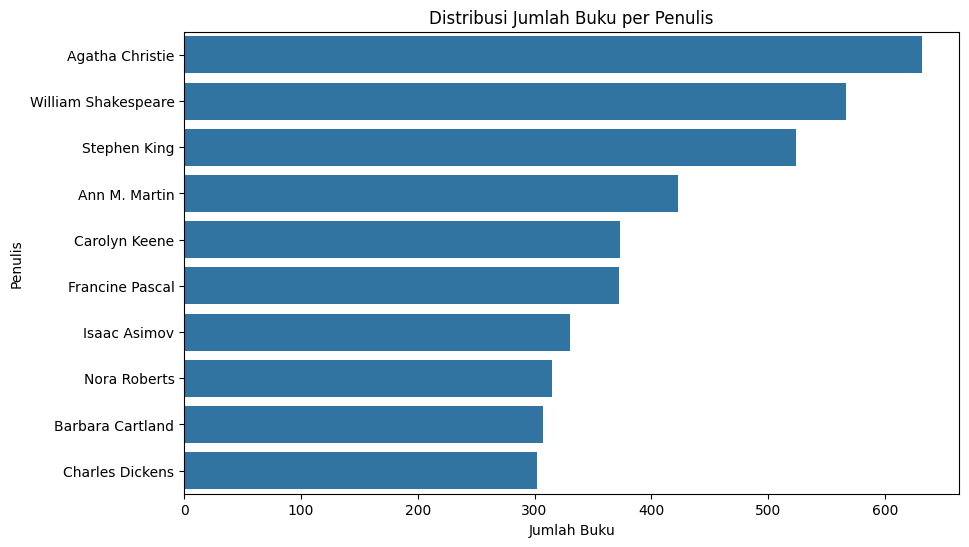

In [ ]:
# Menghitung jumlah buku per penulis
author_counts = books['book_author'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(y=author_counts.index, x=author_counts.values)
plt.title('Distribusi Jumlah Buku per Penulis')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.show()

Dari output tersebut, diketahui bahwa Agatha Christie menempati posisi teratas sebagai penulis dengan jumlah buku terbanyak, yang kemudian diikuti oleh William Shakespeare, Stephen King, dsb.

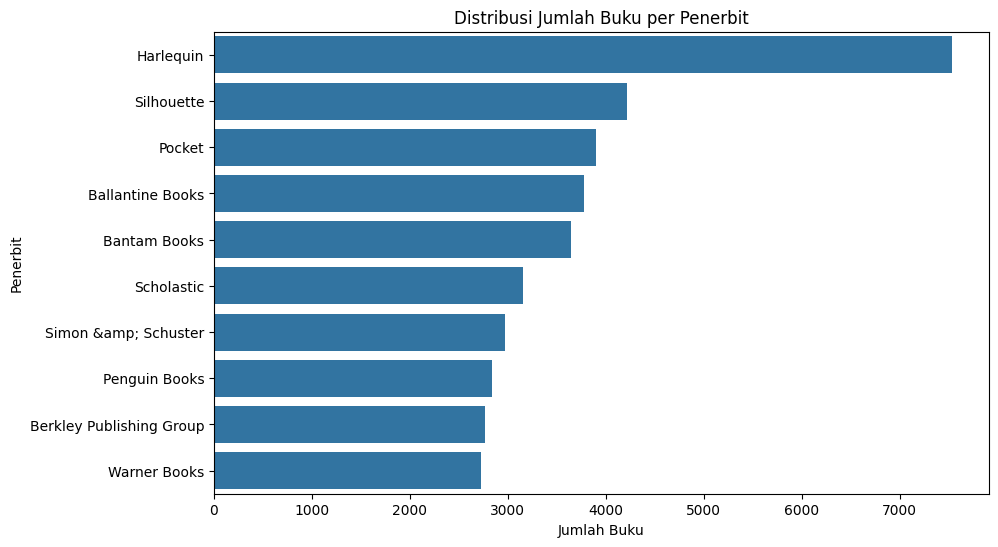

In [ ]:
# Menghitung jumlah buku per penerbit
publisher_counts = books['publisher'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(y=publisher_counts.index, x=publisher_counts.values)
plt.title('Distribusi Jumlah Buku per Penerbit')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penerbit')
plt.show()

Dari output tersebut, diketahui bahwa Harlequin menempati posisi teratas sebagai penerbit dengan jumlah buku terbanyak, jauh melampaui penerbit lainnya.

### **File Ratings**

In [ ]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_baris_ratings, jumlah_kolom_ratings = ratings.shape

print("Jumlah baris:", jumlah_baris_ratings)
print("Jumlah kolom:", jumlah_kolom_ratings)

ratings.head()

Jumlah baris: 1149780
Jumlah kolom: 3


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Output kode di atas memberikan informasi sebagai berikut:

* Terdapat **1.149.780 baris** dalam dataset.
* Terdapat **3 kolom** dalam dataset, yang terdiri dari: **User-ID**, **ISBN**, dan **Book-Rating**.

In [ ]:
# Mengubah nama kolom
ratings = ratings.rename(columns={
    'User-ID': 'UserID',
    'Book-Rating': 'book_rating'
})
ratings.head()

,UserID,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Melihat info file ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserID       1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Dari output di atas, diketahui bahwa:
* Terdapat kolom dengan **tipe data object**, yaitu **kolom ISBN**.
* Terdapat kolom numerik dengan **tipe data int64**, yaitu **kolom UserID** dan **book_rating**.

In [ ]:
# Melihat distribusi ratings
ratings.describe()

,UserID,book_rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Dari output di atas, diketahui bahwa **nilai maksimum rating adalah 10** dan **nilai minimumnya adalah 0**. Tapi perlu diingat kembali, rating pada dataset ini dapat bersifat **eksplisit** (yang ditunjukkan dengan pemberian **nilai antara 1 sampai 10**) atau **implisit** (yang ditunjukkan dengan **nilai 0**).

Karena proyek ini akan berfokus pada Collaborative Filtering, maka rating yang digunakan adalah rating yang bersifat eksplisit. Sehingga rating yang bersifat implisit akan dihapus dari dataset.

In [ ]:
# Mengambil baris yang memiliki rating selain nilai 0
ratings = ratings[ratings['book_rating'] != 0]

# Melihat distribusi rating
ratings.describe()

,UserID,book_rating
count,433671.000000,433671.000000
mean,135458.743451,7.601066
std,80678.385078,1.843798
min,8.000000,1.000000
25%,66619.000000,7.000000
50%,133184.000000,8.000000
75%,205735.000000,9.000000
max,278854.000000,10.000000


In [ ]:
# Jumlah buku yang unik berdasarkan ISBN
print('Jumlah buku: ', len(ratings.ISBN.unique()))

# Jumlah user
print('Jumlah user: ', len(ratings.UserID.unique()))

# Jumlah data rating
print('Jumlah rating: ', len(ratings.book_rating))

Jumlah buku:  185973
Jumlah user:  77805
Jumlah rating:  433671


Dari output di atas, diketahui bahwa:
* Jumlah buku yang unik berdasarkan ISBN adalah **185.973 buku**.
* Terdapat total **77.805 user**.
* Terdapat total **433.671 rating**.

In [ ]:
# Memeriksa duplikasi
print("Jumlah duplikasi pada ratings: ", ratings.duplicated().sum())

Jumlah duplikasi pada ratings:  0


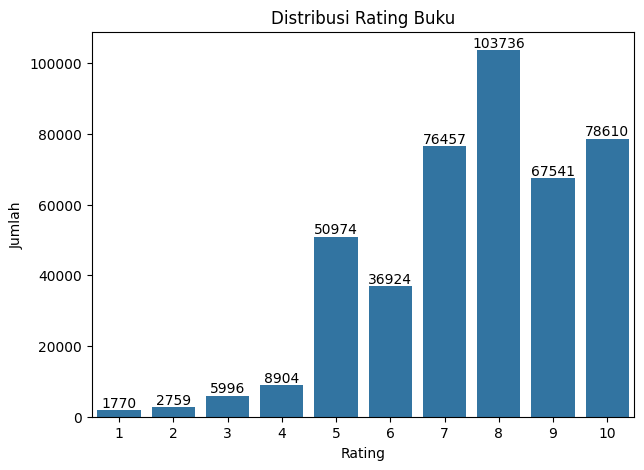

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='book_rating', data=ratings)
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')

# Menambahkan label jumlah di atas bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')
plt.show()

Grafik ini menunjukkan jumlah rating yang diberikan oleh pengguna terhadap buku dalam skala 1 hingga 10. Dari grafik ini diperoleh beberapa poin:
* Terdapat 103.736 user yang memberikan rating 8, yang berarti mayoritas pengguna cenderung memberikan penilaian positif terhadap buku yang mereka baca.
* Rating rendah (seperti 1, 2, dan 3) sangat jarang diberikan, yang berarti user jarang memberikan penilaian negatif.

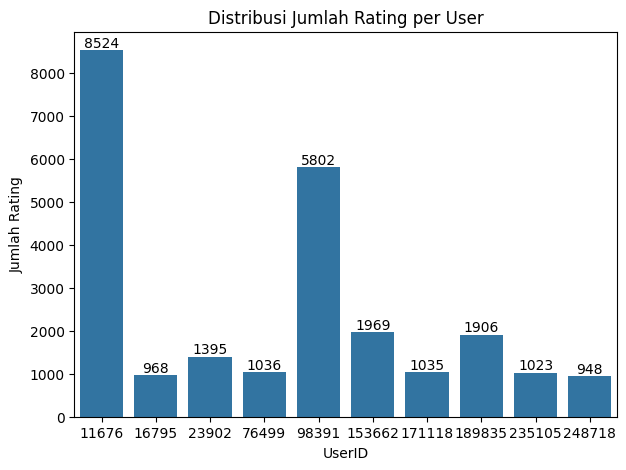

In [ ]:
user_activity = ratings['UserID'].value_counts().head(10)
plt.figure(figsize=(7,5))
ax = sns.barplot(x=user_activity.index, y=user_activity.values)
plt.title('Distribusi Jumlah Rating per User')
plt.xlabel('UserID')
plt.ylabel('Jumlah Rating')

# Menambahkan label jumlah di atas bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')
plt.show()

Dari grafik ini diketahui bahwa user dengan ID 11676 merupakan user yang paling banyak memberikan rating buku, dengan total mencapai 8.524 rating. Posisi berikutnya diikuti oleh user dengan ID 98391 dengan total 5.802 rating.

### **File Users**

In [ ]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_baris_users, jumlah_kolom_users = users.shape

print("Jumlah baris:", jumlah_baris_users)
print("Jumlah kolom:", jumlah_kolom_users)

users.head()

Jumlah baris: 278858
Jumlah kolom: 3


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Output kode di atas memberikan informasi sebagai berikut:

* Terdapat **278.858 baris** dalam dataset.
* Terdapat **3 kolom** dalam dataset, yang terdiri dari: **User-ID**, **Location**, dan **Age**.

In [ ]:
# Mengubah nama kolom
users = users.rename(columns={
    'User-ID': 'UserID',
    'Location': 'location',
    'Age': 'age'
})
users.head()

,UserID,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Melihat info file users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   UserID    278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Dari output di atas, diketahui bahwa:
* Terdapat kolom dengan **tipe data object**, yaitu **location**.
* Terdapat kolom numerik dengan **tipe data int64**, yaitu **UserID**.
* Dan kolom numerik dengan **tipe data float64**, yaitu **age**

In [ ]:
# Melihat distribusi user
users.describe()

,UserID,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Dari output di atas, diketahui bahwa **rata-rata usia pengguna** adalah **34.75 tahun**. Kemudian, jika diperhatikan pada **usia minimum dan maksimum pengguna**, yaitu **0 dan 244 tahun**, tentu tidak realistis. Oleh karena itu, akan dilakukan pengecekan lebih lanjut untuk bagian usia.

In [ ]:
# Jumlah user
print('Jumlah user: ', len(users.UserID.unique()))

# Jumlah lokasi
print('Jumlah lokasi: ', len(users.location.unique()))

# Data umur user
print('Data umur: ', users.age.unique())

Jumlah user:  278858
Jumlah lokasi:  57339
Data umur:  [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]


Dari output di atas, diketahui bahwa:
* Terdapat total **278.858 user**.
* Terdapat total **57.339 lokasi** berbeda yang tercatat dari user, yang berarti user yang memberikan rating berasal dari berbagai tempat yang berbeda.
* Banyak terdapat anomali atau usia yang tidak realistis pada dataset ini, terlihat dari usia pelanggan yang berada dibawah 10 tahun atau diatas 100 tahun, dsb.

In [ ]:
# Memeriksa duplikasi
print("Jumlah duplikasi pada users: ", users.duplicated().sum())

Jumlah duplikasi pada users:  0


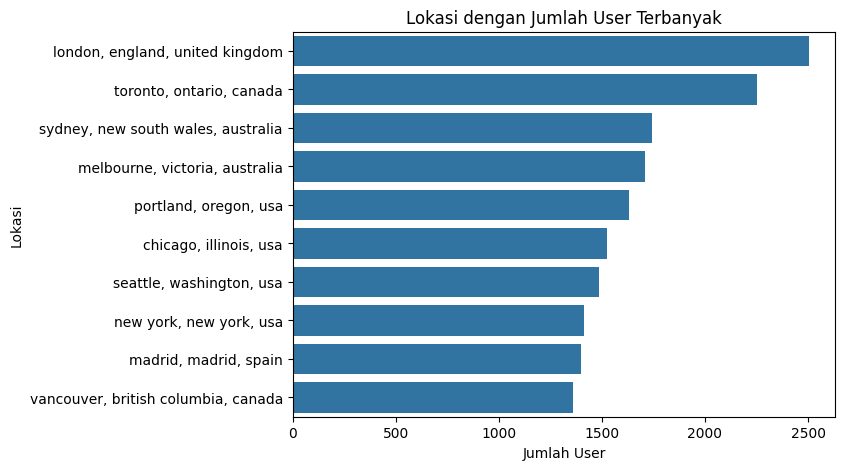

In [ ]:
# Menghitung jumlah user per lokasi
location_counts = users['location'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(7,5))
sns.barplot(y=location_counts.index, x=location_counts.values)
plt.title('Lokasi dengan Jumlah User Terbanyak')
plt.xlabel('Jumlah User')
plt.ylabel('Lokasi')
plt.show()

Dari grafik tersebut, diketahui bahwa:
* London menempati posisi teratas dengan jumlah user paling banyak, yang kemudian diikuti oleh Toronto dan Sydney.
* Kota‑kota dari Amerika Utara (AS dan Kanada) mendominasi daftar secara jumlah lokasi.  

## **Data Preprocessing**

### **File Books**

In [ ]:
# Mengecek missing value pada file books
print(books.isna().sum())

ISBN           0
book_title     0
book_author    2
year           0
publisher      2
image_url_s    0
image_url_m    0
image_url_l    3
dtype: int64


Berdasarkan hasil output tersebut, diketahui bahwa terdapat 3 fitur yang memiliki missing value, yaitu kolom **book_author**, **publisher**, dan **image-url-l**.

In [ ]:
# Mengecek baris yang memiliki missing value
books[books.isnull().any(axis=1)]

,ISBN,book_title,book_author,year,publisher,image_url_s,image_url_m,image_url_l
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Dari output di atas, diketahui bahwa ISBN dengan nomor **078946697X**, **2070426769**, dan **0789466953** mengalami **missalignment kolom**, dimana nilai book_author diisi dengan nilai dari year, dan seterusnya.

In [ ]:
# Mengatasi missalignment kolom
def fix_row(row):
    if str(row['book_author']).isdigit():
        # Menggeser nilai ke kolom yang benar
        row['image_url_l'] = row['image_url_m']
        row['image_url_m'] = row['image_url_s']
        row['image_url_s'] = row['publisher']
        row['publisher'] = row['year']
        row['year'] = int(row['book_author'])
        row['book_author'] = np.nan
    return row

books = books.apply(fix_row, axis=1)

In [ ]:
# Mengecek missing value pada file books
print(books.isna().sum())

ISBN           0
book_title     0
book_author    5
year           0
publisher      2
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64


In [ ]:
# Mengecek baris yang memiliki missing value
books[books.isnull().any(axis=1)]

,ISBN,book_title,book_author,year,publisher,image_url_s,image_url_m,image_url_l
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",NaN,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",NaN,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",NaN,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


Dari output di atas, terlihat bahwa missalignment kolom sudah ditangani. Namun, karena untuk modeling yang akan digunakan adalah kolom **ISBN**, **book_title**, dan **book_author**, maka kolom tersebut yang mengandung nilai NaN akan dihapus dan kolom lain yang memiliki nilai NaN akan dibiarkan.

In [ ]:
# Memilih ISBN tertentu
isbn_list = ["0751352497", "9627982032", "078946697X", "2070426769", "0789466953"]

# Memilih hanya beberapa kolom yang ingin ditampilkan
selected_col = ["ISBN", "book_title", "book_author", "year", "publisher"]

# Menampilkan kolom teks secara penuh
pd.set_option('display.max_colwidth', None)

# Menampilkan data
books.loc[books["ISBN"].isin(isbn_list), selected_col]

,ISBN,book_title,book_author,year,publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",NaN,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",NaN,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",NaN,2000,DK Publishing Inc


Dari output tersebut, diketahui bahwa book_author dari ISBN dengan nomor **078946697X**, **2070426769**, dan **0789466953** salah diisi di kolom book_title. Oleh karena itu, akan dilakukan perbaikan untuk baris tersebut.

In [ ]:
# ISBN dengan no. '078946697X'
books.loc[books.ISBN == '078946697X','book_author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','book_title'] = (
    "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
)

# ISBN dengan no. '2070426769'
books.loc[books.ISBN == '2070426769','book_author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','book_title'] = "Peuple du ciel, suivi de 'Les Bergers"

# ISBN dengan no. '0789466953'
books.loc[books.ISBN == '0789466953','book_author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','book_title'] = (
    "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
)

In [ ]:
# Menghapus baris yang kolom 'book_author' bernilai NaN
books_clean = books.dropna(subset=['book_author'])

# Mengecek missing value pada file books
print(books_clean.isna().sum())

ISBN           0
book_title     0
book_author    0
year           0
publisher      2
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64


### **File Ratings**

In [ ]:
# Mengecek missing value pada file ratings
print(ratings.isna().sum())

UserID         0
ISBN           0
book_rating    0
dtype: int64


In [ ]:
# Menghitung jumlah rating per user
user_rating_counts = ratings['UserID'].value_counts()

# Membuat mask untuk user aktif
active_users_mask = user_rating_counts > 200

# Mengambil daftar user aktif
active_users = active_users_mask[active_users_mask].index
active_users.shape

(144,)

In [ ]:
# Memfilter dataset rating hanya untuk user aktif
ratings = ratings[ratings['UserID'].isin(active_users)]
ratings.shape

(69226, 3)

### **File Users**

In [ ]:
# Mengecek missing value pada file users
print(users.isna().sum())

UserID           0
location         0
age         110762
dtype: int64


Berdasarkan output di atas, diketahui bahwa kolom Age memiliki **missing value**, dengan total mencapai **110.762 data**. Karena kolom ini tidak akan digunakan dalam membangun model dan juga memiliki nilai yang tidak realisitis seperti yang telah dijelaskan sebelumnya, maka kolom ini akan dihapus.

In [ ]:
# Menghapus kolom
users_clean = users.drop('age', axis=1)

# Mengecek informasi pada file users
print(users_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   UserID    278858 non-null  int64 
 1   location  278858 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB
None


In [ ]:
# Memilih kolom 'ISBN', 'book_author', dan 'book_title' dari file books
books_selected = books_clean[['ISBN', 'book_title', 'book_author']]
print(type(books_selected))

# Menampilkan kolom teks secara penuh
pd.set_option('display.max_colwidth', None)

# Menggabungkan file rating dengan book_selected berdasarkan nilai ISBN
book_final = pd.merge(ratings, books_selected, on='ISBN', how='inner')
book_final.head()

<class 'pandas.core.frame.DataFrame'>


,UserID,ISBN,book_rating,book_title,book_author
0,2276,0020960808,10,The Natural Superiority of Women,Ashley Montagu
1,2276,0030632366,9,Outrageous Acts and Everyday Rebellions,Gloria Steinem
2,2276,0061030643,8,The Associate,Phillip Margolin
3,2276,0061098353,8,Twice Dying,Neil McMahon
4,2276,0061099155,9,People of Darkness (Jim Chee Novels),Tony Hillerman


In [ ]:
# Memeriksa duplikasi
print("Jumlah duplikasi: ", book_final.duplicated().sum())

# Mengecek missing value
print(book_final.isnull().sum())

Jumlah duplikasi:  0
UserID         0
ISBN           0
book_rating    0
book_title     0
book_author    0
dtype: int64


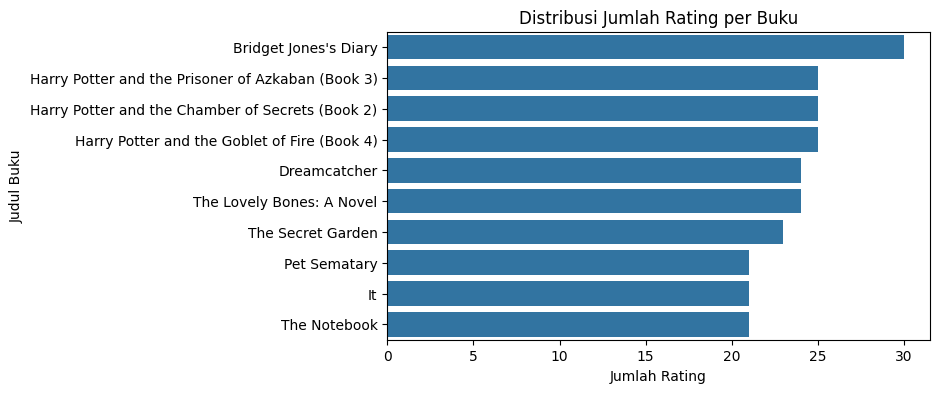

In [ ]:
# Visualisasi buku yang paling banyak dirating
book_popularity = book_final['book_title'].value_counts().head(10)

plt.figure(figsize=(7,4))
sns.barplot(y=book_popularity.index, x=book_popularity.values)
plt.title('Distribusi Jumlah Rating per Buku')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Buku')
plt.xticks()
plt.show()

Dari grafik tersebut, diketahui bahwa Buku Bridget Jones's Diary menempati posisi teratas dengan jumlah rating tertinggi, dengan total lebih dari 30 rating. Kemudian diikuti oleh 3 buku dari seri Harry Potter (Book 2, 3, dan 4), dengan total sekitar 25 rating.


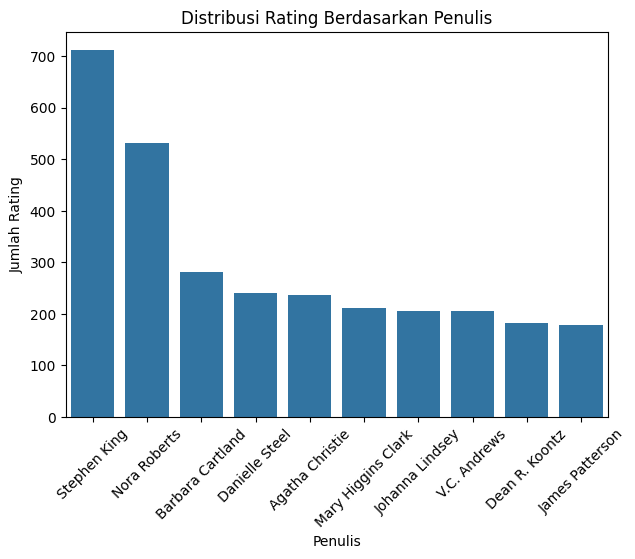

In [ ]:
# Visualisasikan penulis dengan buku yang paling banyak dirating
author_popularity = book_final['book_author'].value_counts().head(10)

plt.figure(figsize=(7,5))
sns.barplot(x=author_popularity.index, y=author_popularity.values)
plt.title('Distribusi Rating Berdasarkan Penulis')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45)
plt.show()

Dari grafik tersebut, diketahui bahwa Buku yang ditulis oleh Stephen King menjadi buku yang paling banyak diberi rating, dengan total mencapai lebih dari 700 rating.

In [ ]:
# Mengubah UserID menjadi list tanpa nilai yang sama
user_ids = book_final['UserID'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [2276, 3757, 4385, 6242, 6251, 6575, 7346, 11676, 13552, 16634, 16795, 23768, 23872, 23902, 25409, 25981, 30276, 30511, 31315, 31556, 31826, 35859, 36606, 37950, 38023, 38273, 39467, 43246, 46398, 49144, 51883, 55490, 56271, 56399, 56447, 56959, 60244, 60707, 63714, 68555, 69078, 69697, 75591, 76499, 76626, 78553, 78973, 79441, 81560, 87141, 88677, 88733, 89602, 93047, 94347, 94853, 95359, 95902, 97874, 98391, 100906, 101209, 101851, 104636, 105517, 107784, 107951, 110934, 110973, 112001, 114368, 114988, 123883, 125774, 128835, 129074, 129716, 130554, 135149, 135265, 140358, 142524, 143175, 147847, 149908, 153662, 156150, 156269, 156467, 157247, 158295, 160541, 162052, 162639, 168245, 171118, 172742, 174304, 177432, 177458, 179978, 182085, 183995, 185233, 189334, 189835, 190925, 193560, 197659, 200226, 203820, 204864, 209516, 212965, 216012, 216683, 217740, 225087, 225232, 225763, 229329, 230522, 234828, 235105, 236283, 240144, 241198, 242006, 245827, 248718, 249894, 2526

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = book_final['ISBN'].unique().tolist()
print('list ISBN: ', book_ids)

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
print('encoded ISBN : ', book_to_book_encoded)

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
print('encoded ISBN : ', book_encoded_to_book)

list ISBN:  ['0020960808', '0030632366', '0061030643', '0061098353', '0061099155', '0071407944', '0131953621', '0133143023', '0139634479', '031209261X', '0312191952', '0312855486', '0312974728', '0312983220', '0312989385', '0340182563', '0345257448', '0345272463', '0345275187', '0345275497', '034528643X', '0345308476', '0345315642', '0345357620', '0345361407', '0345379144', '0345382447', '0345397371', '0345404793', '0345423615', '0345447867', '0345460693', '0380002930', '0380482800', '0380542625', '038072880X', '0380770210', '0385018681', '0385505833', '0393310477', '0394499026', '0395247764', '0399129723', '0399146725', '0425033260', '0425037967', '0425039048', '0425047253', '0425050424', '0425052990', '0425053008', '0425054578', '0425055272', '0425056023', '0425058190', '0425062856', '0425119653', '0425170470', '0425172546', '0425182908', '0440110602', '0440128757', '0440145465', '0440220793', '0440221471', '0440236673', '0440237424', '0440948754', '0441065848', '0441116868', '044131

In [ ]:
# Mapping UserID ke dataframe user
book_final['user'] = book_final['UserID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
book_final['book'] = book_final['ISBN'].map(book_to_book_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_books = len(book_encoded_to_book)
print(num_books)

# Mengubah rating menjadi nilai float
book_final['book_rating'] = book_final['book_rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(book_final['book_rating'])

# Nilai maksimal rating
max_rating = max(book_final['book_rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating))

144
47166
Number of User: 144, Number of Book: 47166, Min Rating: 1.0, Max Rating: 10.0


**Membagi Dataset menjadi Data Training dan Validasi**

In [ ]:
# Mengacak dataset
dataset = book_final.sample(frac=1, random_state=42)
dataset.head()

,UserID,ISBN,book_rating,book_title,book_author,user,book
32858,100906,0375713344,9.0,Geek Love,Katherine Dunn,60,2853
48852,189835,0140187499,5.0,The Short Reign of Pippin IV: A Fabrication (Twentieth Century Classics),John Steinbeck,105,38709
40036,147847,030711886X,5.0,Merry Christmas Mom and Dad (A Golden Look-Look Book),Mercer Mayer,83,12714
2503,11676,0345260791,10.0,Star wars: From the adventures of Luke Skywalker : a novel,George Lucas,7,2410
53037,212965,0843939958,9.0,Violet (Seven Brides Series),Leigh Greenwood,113,9752


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan buku menjadi satu value
x = dataset[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = dataset['book_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * dataset.shape[0])
x_train, x_val, y_train, y_val = (x[:train_indices],
                                  x[train_indices:],
                                  y[:train_indices],
                                  y[train_indices:])

print(x, y)

[[   60  2853]
 [  105 38709]
 [   83 12714]
 ...
 [    5   855]
 [   27 14152]
 [  124 43720]] [0.88888889 0.44444444 0.44444444 ... 0.11111111 1.         0.77777778]


## **Training Model**

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_books, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
# Inisialisasi model
model = RecommenderNet(num_users, num_books, 50)

# Model compile
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

I0000 00:00:1767022143.686693    5048 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767022143.687362    5048 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
# Memulai training
history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = 8,
                    epochs = 15,
                    validation_data = (x_val, y_val))

Epoch 1/15


I0000 00:00:1767022145.537237    5112 service.cc:152] XLA service 0x77fd8006b9e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767022145.537292    5112 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767022145.537299    5112 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767022145.708810    5112 cuda_dnn.cc:529] Loaded cuDNN version 91002


  62/6219 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1199 - root_mean_squared_error: 0.3459

I0000 00:00:1767022146.207766    5112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6219/6219 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0724 - root_mean_squared_error: 0.2669 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1801
Epoch 2/15
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0312 - root_mean_squared_error: 0.1723 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1776
Epoch 3/15
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0271 - root_mean_squared_error: 0.1606 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1678
Epoch 4/15
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0251 - root_mean_squared_error: 0.1545 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1654
Epoch 5/15
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0234 - root_mean_squared_error: 0.1494 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1644
Epoch 6/15
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0221 - root_mean_squared_error: 0.1453 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1635
Epoch 7/15
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 15s

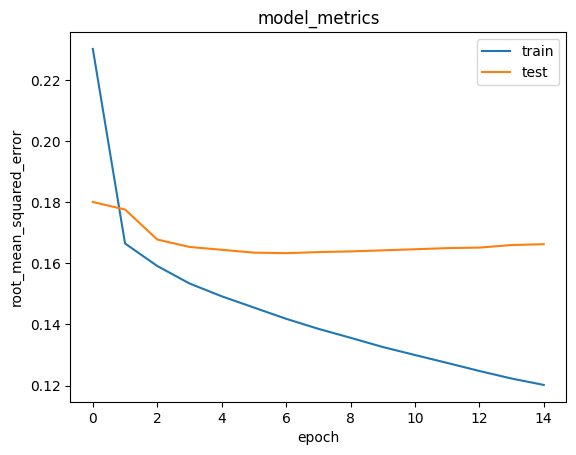

In [ ]:
# Menampilkan visualisasi metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
book_df = books_selected
df = book_final

# Mengambil sample user
user_id = df['UserID'].sample(1).iloc[0]
book_read_by_user = df[df['UserID'] == user_id]

# Operator bitwise (~)
book_not_read = book_df[~book_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN']
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [ ]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]

# Mengambil skor sesuai urutan Top-10
recommended_scores = ratings[top_ratings_indices]

print('Rekomendasi Buku untuk User dengan ID: {}'.format(user_id))
print('===' * 20)
print('Buku dengan Rating Tertinggi dari User')
print('----' * 15)

top_book_user = (
    book_read_by_user.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print('* Judul Buku  :', row.book_title)
    print('  Penulis     :', row.book_author)

print('----' * 15)
print('Rekomendasi 10 Buku Terbaik')
print('----' * 15)

recommended_book = book_df[book_df['ISBN'].isin(recommended_book_ids)].copy()
recommended_book["score"] = recommended_scores

for row in recommended_book.itertuples():
    print('* Judul Buku   :', row.book_title)
    print('  Penulis      :', row.book_author)
    print('  Skor Prediksi:', round(row.score, 4))

1417/1417 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Rekomendasi Buku untuk User dengan ID: 153662
Buku dengan Rating Tertinggi dari User
------------------------------------------------------------
* Judul Buku  : The Millionaire Next Door: The Surprising Secrets of America's Wealthy
  Penulis     : Thomas J. Stanley
* Judul Buku  : Cry for the Strangers
  Penulis     : John Saul
* Judul Buku  : The cradle will fall
  Penulis     : Mary Higgins Clark
* Judul Buku  : Wild Orchids : A Novel
  Penulis     : Jude Deveraux
* Judul Buku  : Change of Heart
  Penulis     : Sally Mandell
------------------------------------------------------------
Rekomendasi 10 Buku Terbaik
------------------------------------------------------------
* Judul Buku   : The Da Vinci Code
  Penulis      : Dan Brown
  Skor Prediksi: 0.9718
* Judul Buku   : A Killing Gift
  Penulis      : Leslie Glass
  Skor Prediksi: 0.9632
* Judul Buku   : The Golden Mean: In Which the Extraordinary Correspondence of Griffin &amp; Sabine C

In [ ]:
tf.keras.backend.clear_session()